In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from kerastuner.tuners import RandomSearch
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.preprocessing import StandardScaler

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)


In [4]:
def build_model(layers):  
    model = keras.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(tf.keras.layers.Conv2D(nodes, (3,3), activation='relu', input_shape=(28, 28, 1)))
            model.add(tf.keras.layers.MaxPooling2D(2, 2))
        else:
            model.add(tf.keras.layers.Conv2D(nodes, (3,3), activation='relu'))
            model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model = KerasClassifier(build_fn=build_model, verbose=0)

In [6]:
layers = [[64], [64, 64]]#,[64, 64, 64],[64, 64, 64, 64]]
epochs = [10, 20, 30]
param_grid = dict(layers=layers, epochs=epochs)
cv=ShuffleSplit(test_size=0.20, n_splits=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)

In [7]:
1+1

2

In [8]:
grid_result = grid.fit(train_images, train_labels)

In [10]:
1+1

2

In [13]:
grid_result.cv_results_

{'mean_fit_time': array([ 491.31978393,  646.39484382,  938.86683512, 1281.46606541,
        1421.27374887, 2316.25124002]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([3.4407959 , 4.61665058, 3.42085004, 4.71937561, 4.02423525,
        6.97796392]),
 'std_score_time': array([0., 0., 0., 0., 0., 0.]),
 'param_epochs': masked_array(data=[10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_layers': masked_array(data=[list([64]), list([64, 64]), list([64]), list([64, 64]),
                    list([64]), list([64, 64])],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'epochs': 10, 'layers': [64]},
  {'epochs': 10, 'layers': [64, 64]},
  {'epochs': 20, 'layers': [64]},
  {'epochs': 20, 'layers': [64, 64]},
  {'epochs': 30, 'layers': [64]},
  {'epochs': 30, 'layers': [64, 64]}],
 'spl

In [12]:
[str(x+1) for x in range(len(layers))]

['1', '2']

In [18]:
 def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= str(val) + ': ' + name_param_2)

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')




In [15]:
scores_mean = grid_result.cv_results_['mean_test_score']

In [ ]:
grid_result.cv_results_

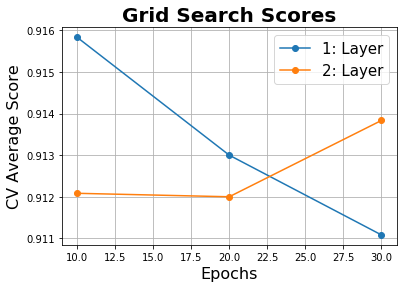

In [19]:
# Calling Method 
plot_grid_search(grid_result.cv_results_, epochs,[str(x+1) for x in range(len(layers))], 'Epochs', 'Layer')